# Fully Connected Neural Network

In [69]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import glob
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler

In [70]:
import pandas as pd
import numpy as np
import os
import glob

In [71]:
X = np.empty((420,2))
parent_folder_path = '/Users/nimitt/Documents/SRIP/SemiconductorFabricationGAA/Data_GAA/CSV_files'
folders = glob.glob(os.path.join(parent_folder_path, '*'))
for i in range(len(folders)):
    files = glob.glob(os.path.join(folders[i], '*'))
    files.sort()

    for j in range(5):
       
        path = files[j]
        path_break = path.split('/')
        features = np.array(list(map(float,path_break[-1][7:-4].split('_'))))
        X[5*i+j] = features

In [72]:
Y = np.empty((420,20,40))
parent_folder_path = '/Users/nimitt/Documents/SRIP/SemiconductorFabricationGAA/Data_GAA/CSV_files'
folders = glob.glob(os.path.join(parent_folder_path, '*'))
for i in range(len(folders)):
    files = glob.glob(os.path.join(folders[i], '*'))
    files.sort()

    for j in range(len(files)):
        path = files[j]
        data = pd.read_csv(path)
        for k in range(20):
            Y[5*i+j][k] = data[' Metrology_Out'][40*k:40*(k+1)] - 0.008

In [73]:
Y = Y[:, 2:-2, np.r_[0:10]]
Y = Y[:,::2,::2]

In [74]:
Y = Y.reshape(420,-1)

In [75]:
Y.shape

(420, 40)

In [76]:
C = np.empty((420,3,20,40))
parent_folder_path = '/Users/nimitt/Documents/SRIP/SemiconductorFabricationGAA/Data_GAA/CSV_files'
folders = glob.glob(os.path.join(parent_folder_path, '*'))
for i in range(len(folders)):
    files = glob.glob(os.path.join(folders[i], '*'))
    files.sort()

    for j in range(len(files)):
        path = files[j]
        data = pd.read_csv(path)
        for k in range(20):
            C[5*i+j][0][k] = data['x1'][40*k:40*(k+1)]
            C[5*i+j][1][k] = data[' y1'][40*k:40*(k+1)]
            C[5*i+j][2][k] = data[' z1'][40*k:40*(k+1)]

In [77]:
C = C[:,:, 2:-2, np.r_[0:10]]
C = C[:,:,::2,::2]

In [78]:
C = C.reshape(420,3,-1)

In [79]:
C.shape

(420, 3, 40)

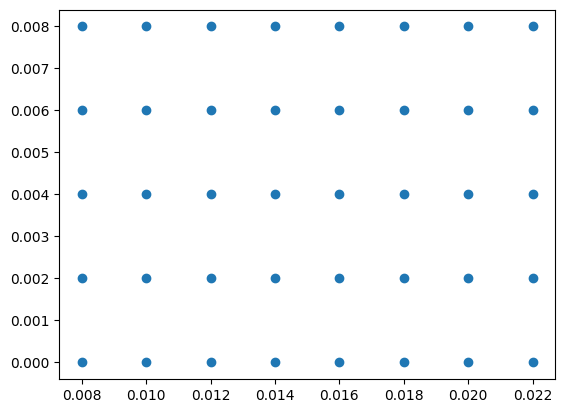

In [80]:
plt.scatter(C[j][1],C[j][2])

In [81]:
X_fnn = X.copy()
Y_fnn = Y.copy()

In [82]:
X_scaler = MinMaxScaler()
X_fnn = X_scaler.fit_transform(X_fnn)

In [83]:
Y_scaler = MinMaxScaler()
Y_fnn = Y_scaler.fit_transform(Y_fnn)

In [84]:
X_train, X_test, Y_train, Y_test, C_train, C_test = train_test_split(X_fnn, Y_fnn,C,train_size = 0.8)

# Tensorification

X_train = torch.tensor(X_train, dtype=torch.float32)
Y_train = torch.tensor(Y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
Y_test = torch.tensor(Y_test, dtype=torch.float32)

train_dataset = TensorDataset(X_train, Y_train)
test_dataset = TensorDataset(X_test, Y_test)


In [85]:
class FNN2(nn.Module):
    def __init__(self):
        super(FNN2, self).__init__()
        self.fc1 = nn.Linear(2, 64)
        self.fc2 = nn.Linear(64, 128)
        self.fc3 = nn.Linear(128, 256)
        self.fc4 = nn.Linear(256, 128)
        self.fc5 = nn.Linear(128, 40)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)      
        return x
    
model2 = FNN2()
criterion = nn.MSELoss()
optimizer = optim.Adam(model2.parameters(), lr=0.01)

In [86]:

train_loss = []
test_loss = []
def train(model, criterion, optimizer, num_epochs):
   
    for epoch in range(num_epochs):
            
            
        # Forward pass
        outputs = model(X_train)
        loss = criterion(outputs, Y_train)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss.append(loss.item())
        with torch.no_grad():
            test_loss.append(criterion(model(X_test),Y_test))
            
        if (epoch+1) % 1 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}]], Loss: {loss.item():.7f}')

In [87]:
X_train.shape

torch.Size([336, 2])

In [88]:
Y_train.shape

torch.Size([336, 40])

In [89]:
with torch.no_grad():
    out = model2(X_train)
    loss = criterion(out,Y_train)
    print(loss)

tensor(0.3619)


In [90]:
train(model2, criterion,optimizer,1000)

Epoch [1/1000]], Loss: 0.3619371
Epoch [2/1000]], Loss: 0.1833631
Epoch [3/1000]], Loss: 1.0977919
Epoch [4/1000]], Loss: 0.1335614
Epoch [5/1000]], Loss: 0.2332371
Epoch [6/1000]], Loss: 0.2947578
Epoch [7/1000]], Loss: 0.3156191
Epoch [8/1000]], Loss: 0.3207266
Epoch [9/1000]], Loss: 0.3194555
Epoch [10/1000]], Loss: 0.3149658
Epoch [11/1000]], Loss: 0.3085033
Epoch [12/1000]], Loss: 0.3003751
Epoch [13/1000]], Loss: 0.2906466
Epoch [14/1000]], Loss: 0.2792446
Epoch [15/1000]], Loss: 0.2659503
Epoch [16/1000]], Loss: 0.2506325
Epoch [17/1000]], Loss: 0.2332342
Epoch [18/1000]], Loss: 0.2140132
Epoch [19/1000]], Loss: 0.1934596
Epoch [20/1000]], Loss: 0.1723049
Epoch [21/1000]], Loss: 0.1525113
Epoch [22/1000]], Loss: 0.1365960
Epoch [23/1000]], Loss: 0.1264973
Epoch [24/1000]], Loss: 0.1204385
Epoch [25/1000]], Loss: 0.1132302
Epoch [26/1000]], Loss: 0.1041912
Epoch [27/1000]], Loss: 0.0994591
Epoch [28/1000]], Loss: 0.0978170
Epoch [29/1000]], Loss: 0.0885572
Epoch [30/1000]], Loss:

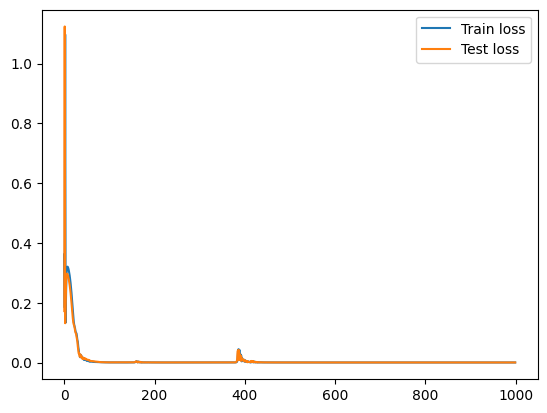

In [91]:
sr = np.arange(len(train_loss))
plt.plot(sr, train_loss,label = 'Train loss')
plt.plot(sr,test_loss, label = 'Test loss')
plt.legend()

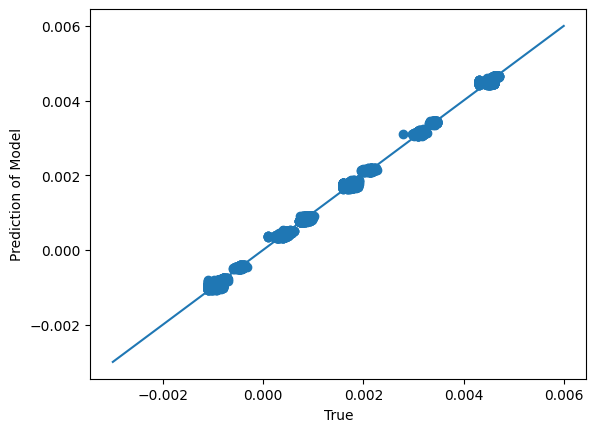

In [92]:
with torch.no_grad():
    y_hat = Y_scaler.inverse_transform(model2((X_train)))

plt.scatter(Y_scaler.inverse_transform(Y_train).reshape(-1,1),y_hat.reshape(-1,1))
plt.plot([-0.003,0.006],[-0.003,0.006])
plt.xlabel('True')
plt.ylabel('Prediction of Model')
plt.show()


In [93]:
X_new = X_scaler.fit_transform(X)
Y_new = X_scaler.fit_transform(Y)
X_new = torch.tensor(X_new, dtype=torch.float32)
Y_new = torch.tensor(Y_new, dtype=torch.float32)

ClFlux =  0.00232 , Time =  1.2931


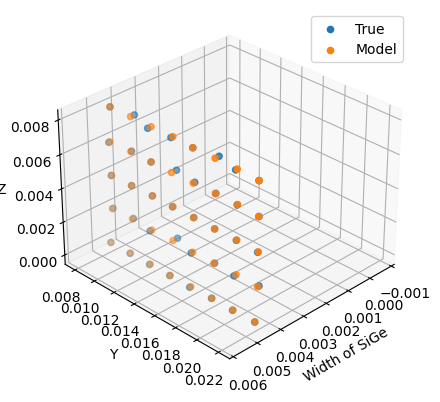

ClFlux =  0.00232 , Time =  2.5862


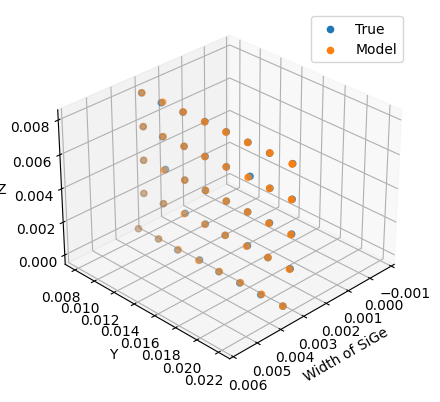

ClFlux =  0.00232 , Time =  3.8793


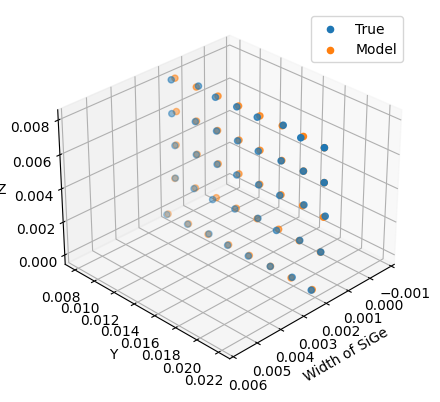

ClFlux =  0.00232 , Time =  5.1724


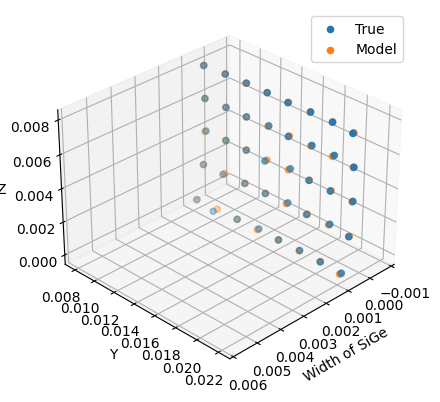

ClFlux =  0.00232 , Time =  6.4655


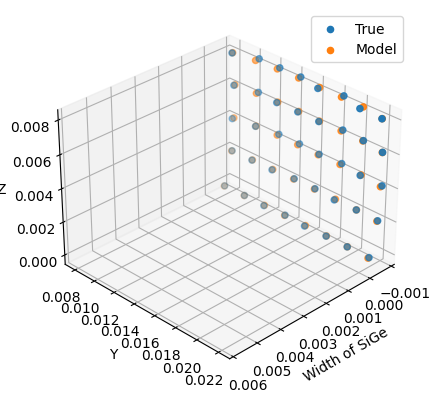

In [94]:
with torch.no_grad():
    y_hat = Y_scaler.inverse_transform(model2((X_new)))


for j in range(5):
    fig = plt.figure()
    ax = plt.axes(projection ='3d')
    print('ClFlux = ',X[j][0],', Time = ',X[j][1])
    
    y = C_train[j][1]
    z = C_train[j][2]
    x = Y_scaler.inverse_transform(Y_new)[j]
    # print(x)
    x_model = y_hat[j]
    # print(x_model)
    ax.scatter3D(x, y, z,label = 'True')
    ax.scatter3D(x_model, y, z,label = 'Model')
    ax.set_xlabel('Width of SiGe')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim(-0.001, 0.006)
    ax.view_init(elev=30, azim=45)  
    plt.legend()

    plt.show()
    # plt.scatter(x,x_model)
    # x_0 = min(min(x),min(x_model))
    # x_1 = max(max(x),max(x_model))
    # plt.plot([x_0,x_1],[x_0,x_1])

ClFlux =  0.00232 , Time =  5.1724


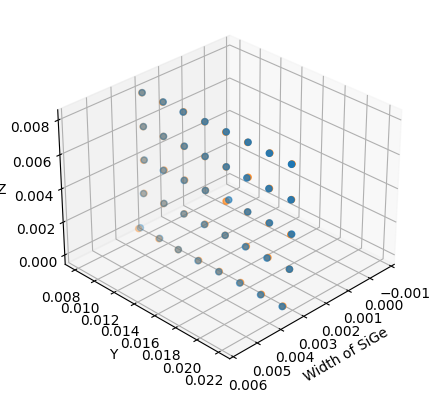

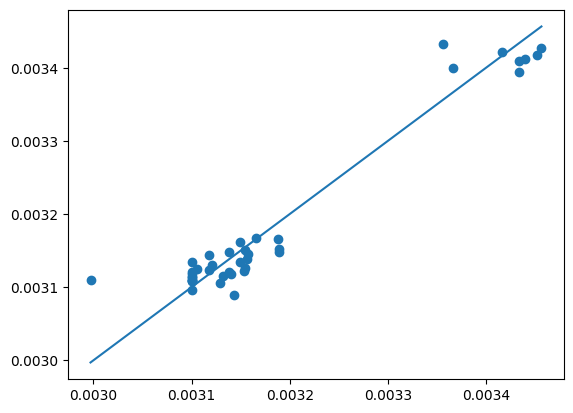

In [95]:
with torch.no_grad():
    y_hat = Y_scaler.inverse_transform(model2((X_test)))

for j in [np.random.randint(len(Y_test))]:
    fig = plt.figure()
    ax = plt.axes(projection ='3d')
    print('ClFlux = ',X[j][0],', Time = ',X[j][1])
    
    y = C_train[j][1]
    z = C_train[j][2]
    x = Y_scaler.inverse_transform(Y_test)[j]
    x_model = y_hat[j]
    ax.scatter3D(x, y, z)
    ax.scatter3D(x_model, y, z)
    ax.set_xlabel('Width of SiGe')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim(-0.001, 0.006)
    ax.view_init(elev=30, azim=45)  

   

    plt.show()

    plt.scatter(x,x_model)
    x_0 = min(min(x),min(x_model))
    x_1 = max(max(x),max(x_model))
    plt.plot([x_0,x_1],[x_0,x_1])

In [96]:
def mean_absolute_percentage_error_multidimensional(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / np.maximum(y_true, np.finfo(float).eps)), axis=0) * 100
    return np.mean(mape)
with torch.no_grad():
    y_hat = model2((X_train))
mape = mean_absolute_percentage_error_multidimensional(y_hat, Y_train)

print(f"MAPE: {mape}%")


with torch.no_grad():
    out = model2(X_train)
    loss = criterion(out,Y_train)
    print(loss)

#####
def mean_absolute_percentage_error_multidimensional(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / np.maximum(y_true, np.finfo(float).eps)), axis=0) * 100
    return np.mean(mape)
with torch.no_grad():
    y_hat = model2((X_test))
mape = mean_absolute_percentage_error_multidimensional(y_hat, Y_test)

print(f"MAPE: {mape}%")


with torch.no_grad():
    out = model2(X_test)
    loss = criterion(out,Y_test)
    print(loss)

MAPE: 10.347349166870117%
tensor(0.0001)
MAPE: 12.85675048828125%
tensor(0.0001)
